## Bar charts

* Мы будем анализировать, отличается ли среднее количество коммитов в рабочие дни и выходные, и построим соответствующие графики.

#### 1. Подключаемся к базе

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('../data/checking-logs.sqlite')

#### 2. Загрузка данных

In [38]:
query = """
SELECT timestamp
FROM checker
WHERE uid NOT LIKE 'admin%' AND labname IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


#### 3. Обработка и группировка данных

In [39]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

df.head()

,timestamp,day_of_week,hour,is_weekend
0,2020-04-17 05:19:02.744528,Friday,5,False
1,2020-04-17 05:22:35.249331,Friday,5,False
2,2020-04-17 05:22:45.549397,Friday,5,False
3,2020-04-17 05:34:14.691200,Friday,5,False
4,2020-04-17 05:34:24.422370,Friday,5,False


In [40]:
grouped = df.groupby(['hour', 'is_weekend']).size().unstack(fill_value=0)

grouped.columns = ['Working Days', 'Weekends']

print(grouped.to_string())

      Working Days  Weekends
hour                        
0                6         6
1                0         6
3                2         1
5               15         2
6                3         0
7               31        16
8               37        28
9               30        21
10             131        27
11              88       118
12              79        57
13              72       108
14             121        86
15             140       114
16             170        74
17             192        49
18             167        61
19             214       103
20             183       116
21             292        72
22              45        59
23              15        32


#### 4. Потсроение графиков

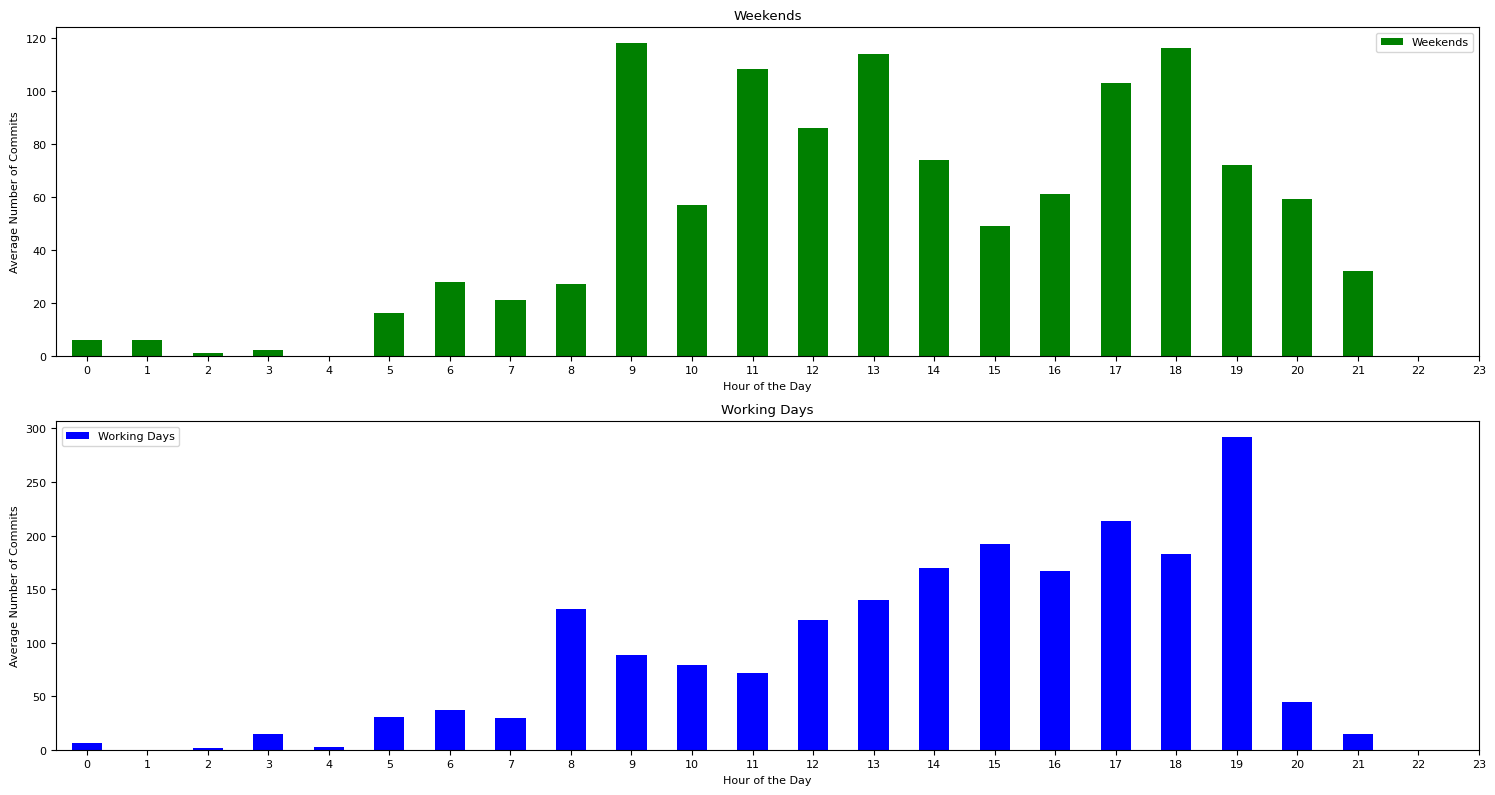

In [41]:
plt.rcParams['font.size'] = 8

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(15, 8))

grouped['Working Days'].plot(kind='bar', ax=ax1, color='blue', title='Working Days')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Number of Commits')
ax1.set_xticks(range(24))
ax1.set_xticklabels(range(24), rotation=0)
ax1.legend(loc='upper left')

grouped['Weekends'].plot(kind='bar', ax=ax2, color='green', title='Weekends')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Average Number of Commits')
ax2.set_xticks(range(24))
ax2.set_xticklabels(range(24), rotation=0)
ax2.legend()

plt.tight_layout()
plt.show()

#### 5. Отвечаем на допы:

* “Is the dynamic different on working days and weekends?”

In [42]:
max_working_hour = grouped['Working Days'].idxmax()

max_weekend_hour = grouped['Weekends'].idxmax()

print(f"The answer is:\nHour when the number of commits is the largest: \n* Working days: {max_working_hour}:00         * Weekends: {max_weekend_hour}:00")

The answer is:
Hour when the number of commits is the largest: 
* Working days: 21:00         * Weekends: 11:00


In [43]:
conn.close()